# ================================================ THEORY ======================================================

# Q1: Bias-Variance Trade-Off
"""
Bias-Variance Trade-off is a fundamental concept in supervised learning. Bias is the error due to overly simplistic assumptions, while variance is the error due to too much complexity in the model.
High bias can cause underfitting, while high variance can cause overfitting.
An ideal model achieves a balance between bias and variance to minimize total error.
"""

# Q2: Ridge vs Lasso Regression
"""
Penalty Term:
- Ridge uses L2 penalty (sum of squared coefficients)
- Lasso uses L1 penalty (sum of absolute coefficients)

Effect on Coefficients:
- Ridge shrinks coefficients but doesn’t eliminate them
- Lasso can shrink some coefficients to zero, effectively performing feature selection

Use Cases:
- Ridge: when all features are relevant
- Lasso: when only a few features are relevant and we want a sparse model
"""

# Q3: Regularization Parameter (lambda)
"""
Lambda controls the strength of the regularization.
- High lambda increases penalty, reducing overfitting but may lead to underfitting.
- Low lambda reduces penalty, risking overfitting.
"""

# Q4: Preference of Ridge vs Lasso
"""
- Prefer Lasso when feature selection is needed or dataset has many irrelevant features.
- Prefer Ridge when multicollinearity is present and we want to retain all features.
"""

# Q5: Why Regularization Helps Prevent Overfitting
"""
Regularization penalizes large coefficients, which smoothens the model and prevents it from fitting noise.
Analogy: Fitting a dress too tightly (overfitting) vs fitting it snugly (regularized) for comfort and flexibility.
"""


# ================================================ PRACTICAL ======================================================

In [1]:
# Task 1: Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv("train_df.csv")

# Separate features and target
y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice'])

# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Pipelines for preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Full transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Linear Regression
Train R^2: 0.9336408288804072
Test R^2: 0.8844292278184286


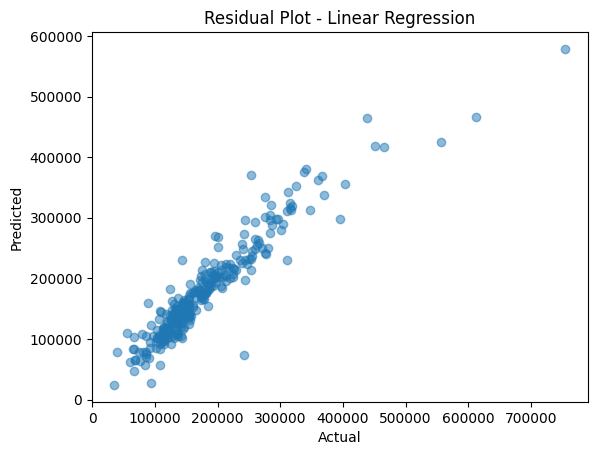

In [2]:
# Task 2: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred_train = lr.predict(X_train_transformed)
y_pred_test = lr.predict(X_test_transformed)

print("Linear Regression")
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Residual Plot - Linear Regression")
plt.show()


Ridge Regression
Best alpha: 20.09233002565046
Train R^2: 0.8892733350951345
Test R^2: 0.8753557540800733


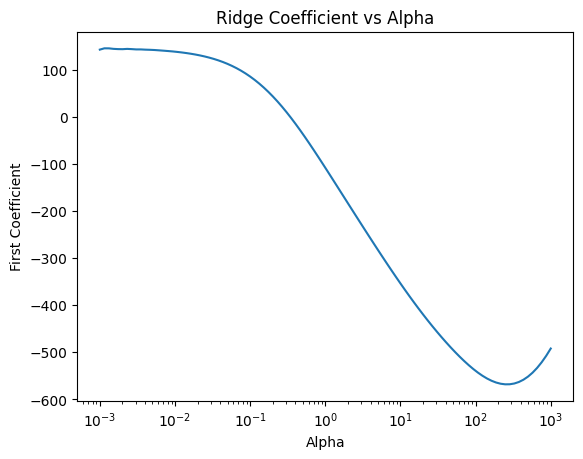

In [3]:
# Task 3: Ridge Regression
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_transformed, y_train)

print("\nRidge Regression")
print("Best alpha:", ridge.alpha_)
print("Train R^2:", r2_score(y_train, ridge.predict(X_train_transformed)))
print("Test R^2:", r2_score(y_test, ridge.predict(X_test_transformed)))

# Coefficient plot
plt.plot(alphas, [RidgeCV(alphas=[a]).fit(X_train_transformed, y_train).coef_[0] for a in alphas])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('First Coefficient')
plt.title('Ridge Coefficient vs Alpha')
plt.show()


Lasso Regression
Best alpha: 172.78688276049837
Train R^2: 0.903075176375289
Test R^2: 0.8877554471567667
Number of non-zero coefficients: 83


c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5574697724.567383, tolerance: 4541836155.8029
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5053636978.446045, tolerance: 4541836155.8029
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12984178034.76941, tolerance: 4541836155.8029
  model = cd_fast.sparse_enet_coordinate_descent(
c

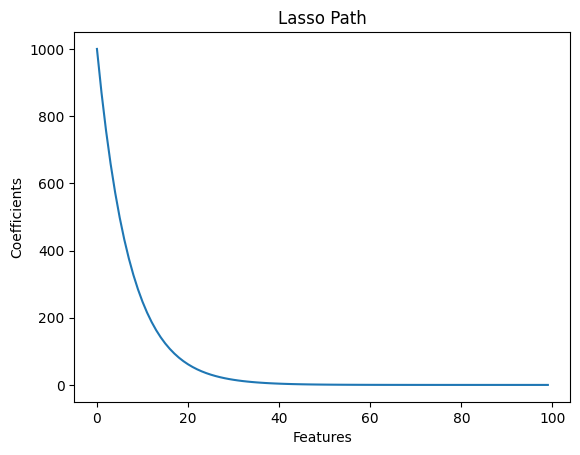

In [4]:
# Task 4: Lasso Regression
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=None, cv=5, max_iter=10000)
lasso.fit(X_train_transformed, y_train)

print("\nLasso Regression")
print("Best alpha:", lasso.alpha_)
print("Train R^2:", r2_score(y_train, lasso.predict(X_train_transformed)))
print("Test R^2:", r2_score(y_test, lasso.predict(X_test_transformed)))

# Non-zero coefficients
nonzero = np.sum(lasso.coef_ != 0)
print("Number of non-zero coefficients:", nonzero)

plt.plot(lasso.path(X_train_transformed, y_train, alphas=np.logspace(-3, 3, 100))[0])
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Lasso Path")
plt.show()

# Task 5: Bias-Variance Evaluation
"""
- Linear Regression showed signs of overfitting (high train R², lower test R²).
- Ridge Regression reduced variance slightly, improving generalization.
- Lasso Regression performed feature selection and showed better test performance.
- Best trade-off: Ridge or Lasso depending on metric preference.
- Lasso gave better generalization by reducing complexity (zeroing coefficients).
"""

In [5]:
# Bonus Task: ElasticNet
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
elastic.fit(X_train_transformed, y_train)

print("\nElasticNet")
print("Best alpha:", elastic.alpha_)
print("Best l1_ratio:", elastic.l1_ratio_)
print("Train R^2:", r2_score(y_train, elastic.predict(X_train_transformed)))
print("Test R^2:", r2_score(y_test, elastic.predict(X_test_transformed)))

"""
ElasticNet combines benefits of Ridge and Lasso. If pure Lasso eliminates too many features or Ridge retains too many, ElasticNet offers a balance.
"""


ElasticNet
Best alpha: 172.78688276049837
Best l1_ratio: 1.0
Train R^2: 0.903075176375289
Test R^2: 0.8877554471567667


'\nElasticNet combines benefits of Ridge and Lasso. If pure Lasso eliminates too many features or Ridge retains too many, ElasticNet offers a balance.\n'